In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read patients information from hospital
df = pd.read_csv('../../masked/patients_info.csv', index_col=0)

In [3]:
# Clean table and prepare for logistic regression
df_multireg = df.dropna()

df_multireg['Feature_0'] = (df_multireg['Feature_0']=='Pos')*1
df_multireg['Feature_1'] = (df_multireg['Feature_1']=='Pos')*1
df_multireg['Feature_2'] = 1-(df_multireg['Feature_2'].str.contains('X|XX'))
df_multireg['Feature_3'] = 1-(df_multireg['Feature_3'].str.contains('XXX'))
df_multireg['Feature_4'] = 1*(df_multireg['Feature_4']=='XXX')
df_multireg['Feature_5'] = 1*(df_multireg['Feature_5']=='XXX')

df_multireg[['Response','Feature_0','Feature_1','Feature_2','Feature_3','Feature_4',\
             'Feature_5','Feature_6','Feature_7','Feature_8']].to_csv('./linear_nona.csv')

In [4]:
# run Rscript logistic_regression.r
pval = pd.read_csv('./multi.pval.csv', index_col=0)
OR = pd.read_csv('./multi.OR.csv', index_col=0)
lr_res = pd.merge(pval, OR, left_index=True, right_index=True, how='inner')

# Log-transform p values
lr_res['x_x'] = -1*lr_res['x_x'].apply(np.log10)

# add colors to features
lr_res['c'] = ((lr_res['x_y']>1)*(lr_res['x_x']>1)*1+\
               (lr_res['x_y']<1)*(lr_res['x_x']>1)*-1).map({-1:'#ff7878',0:'gray',1:'lightblue'})

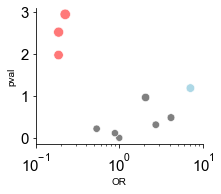

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
label_size = 15
plt.rcParams['font.family'] = 'arial'
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size

plt.subplots(figsize=[3,2.5])
ax = sns.scatterplot(lr_res['x_y'], lr_res['x_x'], s=50+20*lr_res['x_x'], c=lr_res['c'])
plt.xscale('log')
plt.xlim([0.1,10])

plt.ylabel('pval')
plt.xlabel('OR')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('../figures/clinical.pdf')